In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
import pandas as pd
import scipy as scp
import netCDF4
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os

<h2 style="font-size:28px; font-weight:bold;">Preparing Data</h2>

In [2]:
file_path = 'SSTs.nc'
ds = xr.open_dataset(file_path)

In [3]:
ds_grouped = ds.groupby('time.year').mean(dim='time')                                   #Obtained Yearly Meaned Data
tropical_data = ds_grouped.sel(latitude=slice(23.5, -23.5), longitude=slice(0, 360))    #Extracted Data For the Tropics

<h2 style="font-size:28px; font-weight:bold;">Examining SST trends since 1971</h2>

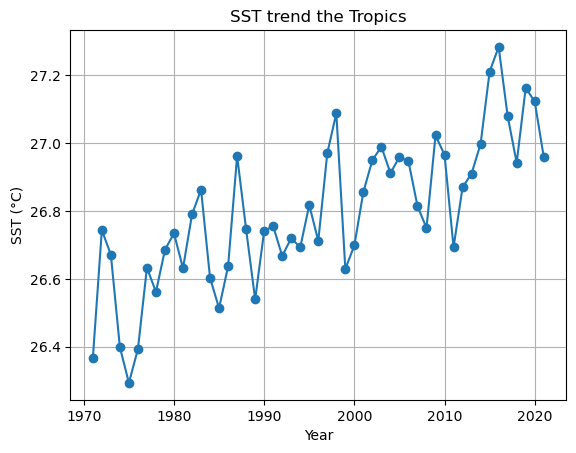

In [4]:
mean_SST = tropical_data.mean(dim=['latitude', 'longitude'])                             #Calculated Mean across Lat and Lon
(mean_SST['sst']-273.15).plot.line(x='year', marker='o', linestyle='-')
plt.title('SST trend the Tropics')
plt.xlabel('Year')
plt.ylabel('SST (°C)')
plt.grid(True)
plt.show()

<h2 style="font-size:24px; font-weight:bold;">Mean yearly SSTs plot examination</h2>

<div style="font-size:18px;">
<p>The displayed plot reveals a clear upward trend in mean yearly SSTs in the tropics over the last fifty years, setting the premise for researching the correlation between elevated SSTs and Tropical cyclones.</p>
</div>


<h2 style="font-size:28px; font-weight:bold;">Visualising Tropical mean SSTs and regions with higher SSTs than Tropical mean</h2>

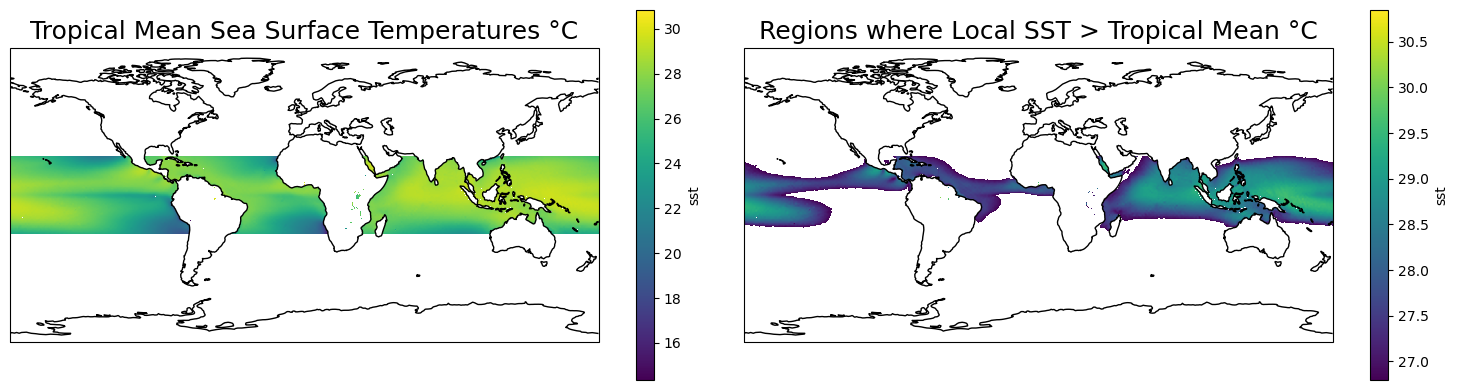

In [5]:
mean_data = tropical_data.mean(dim='year')
TropicalMean = mean_data.mean(dim=['latitude','longitude'])
masked_sst = mean_data['sst'].where(mean_data['sst'] > TropicalMean['sst'])

fig, axs = plt.subplots(1, 2, figsize=[15, 4], subplot_kw={'projection': ccrs.PlateCarree()})
axs[0].coastlines()
axs[0].set_global()

(mean_data['sst'] - 273.15).plot.pcolormesh(ax=axs[0], cmap='viridis', transform=ccrs.PlateCarree())
axs[0].set_title('Tropical Mean Sea Surface Temperatures °C', fontsize=18)

axs[1].coastlines()
axs[1].set_global()

(masked_sst - 273.15).plot.pcolormesh(ax=axs[1], cmap='viridis', transform=ccrs.PlateCarree())

axs[1].set_title('Regions where Local SST > Tropical Mean °C', fontsize=18)


plt.tight_layout()
plt.show()

<h2 style="font-size:24px; font-weight:bold;">Plot examination</h2>

<div style="font-size:18px;">
<p>The objective of the presented plots is to acquaint the audience with regions exhibiting SSTs exceeding the mean tropical SSTs. These areas are of particular interest in my research as I aim to investigate whether SSTs above the Tropical mean contribute to an increased likelihood of TC genesis.</p>
</div>